In [39]:
import torch
import torch.nn as nn

In [52]:
lenet = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5),
                    nn.BatchNorm2d(6),
                    nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(6, 16, kernel_size=5),
                    nn.BatchNorm2d(16),
                    nn.Sigmoid(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Flatten(),
                    nn.Linear(7056, 120),
                    nn.BatchNorm1d(120),
                    nn.Sigmoid(),
                    nn.Linear(120, 84),
                    nn.BatchNorm1d(84),
                    nn.Sigmoid(),
                    nn.Linear(84, 10))

In [41]:
import d2l
from d2l import torch
from d2l.torch import *

In [42]:
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load it into memory."""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="../../data",
                                                    train=True,
                                                    transform=trans,
                                                    download=False)
    mnist_test = torchvision.datasets.FashionMNIST(root="../../data",
                                                   train=False,
                                                   transform=trans,
                                                   download=False)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))


In [43]:
lr =1.0
num_epochs = 10
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=96)

In [44]:
for X, y in train_iter:
    break
X.shape, len(y)

(torch.Size([256, 1, 96, 96]), 256)

In [49]:
def look_in_net(net, X):
    out = X
    
    for layer in net:
        out = layer(out)
        print(f"{layer.__class__.__name__} : {out.shape}")

In [53]:
look_in_net(lenet, X)

Conv2d : torch.Size([256, 6, 92, 92])
BatchNorm2d : torch.Size([256, 6, 92, 92])
Sigmoid : torch.Size([256, 6, 92, 92])
MaxPool2d : torch.Size([256, 6, 46, 46])
Conv2d : torch.Size([256, 16, 42, 42])
BatchNorm2d : torch.Size([256, 16, 42, 42])
Sigmoid : torch.Size([256, 16, 42, 42])
MaxPool2d : torch.Size([256, 16, 21, 21])
Flatten : torch.Size([256, 7056])
Linear : torch.Size([256, 120])
BatchNorm1d : torch.Size([256, 120])
Sigmoid : torch.Size([256, 120])
Linear : torch.Size([256, 84])
BatchNorm1d : torch.Size([256, 84])
Sigmoid : torch.Size([256, 84])
Linear : torch.Size([256, 10])


loss 0.145, train acc 0.947, test acc 0.842
3659.5 examples/sec on cuda:0


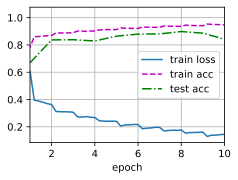

In [54]:
d2l.train_ch6(lenet, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())